In [271]:
import numpy as np
import matplotlib.pyplot as plt

In [272]:
x = np.loadtxt('data2/ex2x.dat')  # 载入数据
y = np.loadtxt('data2/ex2y.dat')

In [273]:
# 整理数据
m = y.shape[0]
x = np.hstack((np.ones((m, 1)), x.reshape(-1, 2)))
y = y.reshape(-1, 1)

3. Plot the Data

In [274]:
pos = [i for i in range(y.shape[0]) if y[i] == 1]
neg = [i for i in range(y.shape[0]) if y[i] == 0]

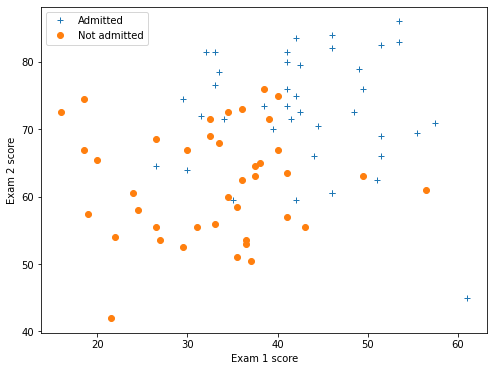

In [275]:
plt.figure(figsize=(8, 6))
plt.plot(x[pos, 1], x[pos, 2], '+', label='Admitted')
plt.plot(x[neg, 1], x[neg, 2], 'o', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

4. Logistic Regression

假设函数：
$$
h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}=P(y=1|x;\theta)
$$

In [276]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

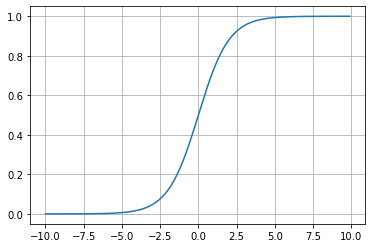

In [277]:
temp = np.arange(-10, 10, 0.1)
plt.plot(temp, sigmoid(temp))
plt.grid()
plt.show()

In [278]:
def h(theta, x):
    return sigmoid(np.dot(x, theta))

似然函数：
$$
J(\theta)=\prod_{i=1}^{m}(h_\theta(x^{(i)}))^{y^{(i)}}(1-h_\theta(x^{(i)}))^{1-y^{(i)}}
$$
对数似然函数：
$$
L(\theta)=\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]
$$
要最大化上式，即最小化其负值：
$$
\mathop{min}\limits_{\theta}L(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]
$$
该式的梯度：
$$
\nabla_\theta L=\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}
$$

In [279]:
def L(theta, x, y):
    m = y.shape[0]
    return (1./m) * (np.dot(-y.T, np.log(h(theta, x))) - np.dot((1-y.T), np.log(1-h(theta, x))))

In [280]:
def descendGradient(learning_rate, theta, X, Y):
    theta_record = []   # 记录theta
    L_record = []       # 记录损失
    temp = L(theta, X, Y)
    iterations = 0
    while True:
        theta_record.append(theta.tolist())
        # print(theta_record)
        theta = theta - (learning_rate/m) * np.dot(X.T, (h(theta, X)-Y))
        cost = L(theta, X, Y)
        L_record.append(cost.tolist())
        iterations += 1
        if abs(temp - cost) < 1e-9:
            break
        temp = cost
    theta_record = np.array(theta_record).reshape(-1, len(theta))
    L_record = np.array(L_record).reshape(-1)
    return theta, theta_record, L_record, iterations

In [281]:
learning_rate = 0.0001
theta = np.zeros((x.shape[1], 1))

In [282]:
theta_0, theta_record_0, L_record_0, iterations_0 = descendGradient(learning_rate, theta, x, y)

In [283]:
iterations_0

11804233

In [284]:
theta_0

array([[-13.52535717],
       [  0.127088  ],
       [  0.12908398]])

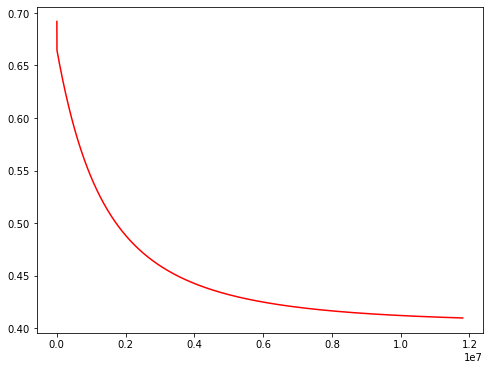

In [285]:
plt.figure(figsize=(8, 6))
plt.plot(range(0, len(L_record_0)), L_record_0, 'r')
plt.show()

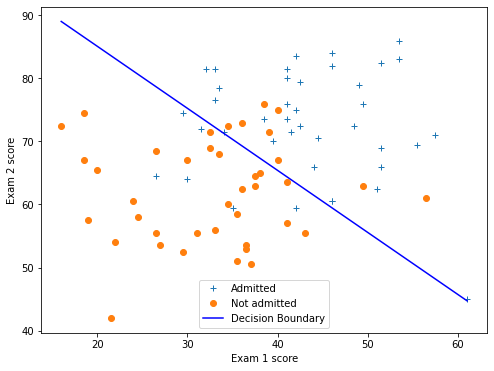

In [286]:
boundary_xs = np.array([np.min(x[:, 1]), np.max(x[:, 1])])
boundary_ys = (-1./theta_0[2]) * (theta_0[0] + theta_0[1] * boundary_xs)

plt.figure(figsize=(8, 6))
plt.plot(x[pos, 1], x[pos, 2], '+', label='Admitted')
plt.plot(x[neg, 1], x[neg, 2], 'o', label='Not admitted')
plt.plot(boundary_xs, boundary_ys, 'b-', label='Decision Boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [287]:
1 - h(theta_0, np.array([1, 20, 80]))

array([0.6585588])

### Newton's Method

$$
\theta^{(t+1)}=\theta^{(t)}-H^{-1}\nabla_\theta L
$$
In logistic regression, the Hessian is:
$$
H = \frac{1}{m}\sum^{m}_{i=1}[h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))x^{(i)}(x^{(i)})^T]
$$

In [288]:
def H(theta, x):
    m, n = x.shape
    temp = (x.T).dot(np.diag(h(theta, x).reshape(-1))).dot(np.diag(1-h(theta, x).reshape(-1))).dot(x)
    return (1./m) * temp
    # temp = np.zeros((n, n))
    # for i in range(m):
    #     temp += h(theta, x[i]) * (1-h(theta, x[i])) * x[i].reshape(-1, 1).dot(x[i].reshape(1, -1))
    # return (1./m) * temp

In [289]:
def newton_method(theta, X, Y):
    theta_record = []   # 记录theta
    L_record = []       # 记录损失
    temp = L(theta, X, Y)
    iterations = 0
    while True:
        theta_record.append(theta.tolist())
        # print(theta_record)
        theta = theta - np.linalg.inv(H(theta, X)).dot((1./m)*(X.T).dot(h(theta, X)-Y))
        cost = L(theta, X, Y)
        L_record.append(cost.tolist())
        iterations += 1
        if abs(temp - cost) < 1e-9:
            break
        temp = cost
    theta_record = np.array(theta_record).reshape(-1, len(theta))
    L_record = np.array(L_record).reshape(-1)
    return theta, theta_record, L_record, iterations

In [290]:
theta = np.zeros((x.shape[1], 1))
theta_1, theta_record_1, L_record_1, iterations_1 = newton_method(theta, x, y)

In [291]:
theta_1

array([[-16.37874341],
       [  0.14834077],
       [  0.15890845]])

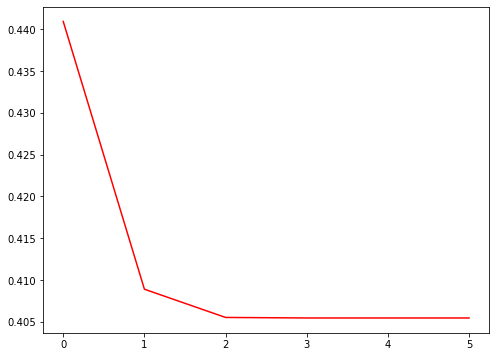

In [292]:
plt.figure(figsize=(8, 6))
plt.plot(range(0, len(L_record_1)), L_record_1, 'r')
plt.show()

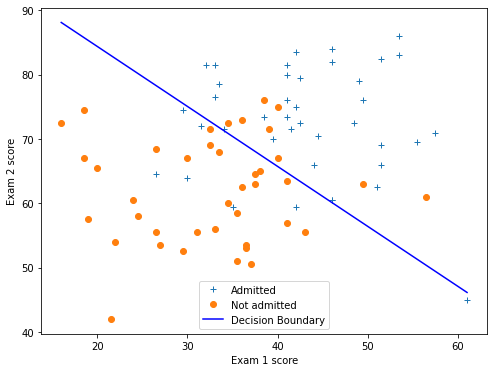

In [293]:
boundary_xs = np.array([np.min(x[:, 1]), np.max(x[:, 1])])
boundary_ys = (-1./theta_1[2]) * (theta_1[0] + theta_1[1] * boundary_xs)

plt.figure(figsize=(8, 6))
plt.plot(x[pos, 1], x[pos, 2], '+', label='Admitted')
plt.plot(x[neg, 1], x[neg, 2], 'o', label='Not admitted')
plt.plot(boundary_xs, boundary_ys, 'b-', label='Decision Boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [294]:
1 - h(theta_1, np.array([1, 20, 80]))

array([0.66802186])